# A demo of Wordle Solvers
- To guess an unknown 5-letter English word in fewest attempts
- Inspired by the Wordle game: https://www.powerlanguage.co.uk/wordle/

# Overview
- Two wordle solvers for a 5-letter Wordle game as follows:

### The Heuristic solver 
``HeuristicWordlePlayer``
- Picks the guess based on **character frequencies**
- A word scores higher if it is composed of common characters rather than rare characters
- The worse and average number of guesses is **6** and **~3.82**, with the first guess as **"raise"**
- Computes on-the-fly. 

### The Maximum Information Gain Solver 
``MaxInformationGainWordlePlayer``
- Picks the guess based on **maximizing information gain**
- A word scores higher if it generates the maximum Shannon entropy from its response distribution(the count of all possible response outcomes with respect to the available target words).
- The worse and average number of guesses is **5** and **~3.65**, with the first guess as **"react"**
- Computes slower and is optimized by pre-computation
- Providing a larger word list as the guess list improves the average number of guesses to **~3.60** with the start word as **"reast", "trace"** etc

### Users can...
``interactive_play``:
- Interact with the solvers to guess an unknown word by providing responses
- Examine the performance of the solvers by providing different target words

``check_first_guess_performance``, ``check_topK_guesses_performance``:
- Specify different "first-guess" words and check the optimal first-guess against all target words
- results are saved in the ``output`` folder

# 1. Import list of words

In [1]:
%load_ext autoreload
%autoreload 2

In [61]:
from main import get_words
from Wordle import Wordle

K = 6

words = get_words(k=K)
print(f"Size of words: {len(words)}")
wordle = Wordle(K, words)
print("Wordle Response Representation\n", wordle.get_response_description())

Size of words: 8077
Wordle Response Representation
 A 6-character response with the format:
- "0": wrong letter
- "1": correct letter but wrong position
- "2": correct letter and correct position


In [62]:
len(words)

8077

In [47]:
hidden = wordle.generate_target()

In [48]:
hidden

'forced'

In [49]:
wordle.response_to_guess("praise",hidden)

'010001'

# 3. Import Solvers

In [66]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

/var/folders/y8/0_f1c8r15g173_kwn5_rb0_80000gn/T/ipykernel_41279/4160143928.py:4: RuntimeWarning: divide by zero encountered in divide
  plt.plot(x, 2/x, label='f(x)=F/BW')


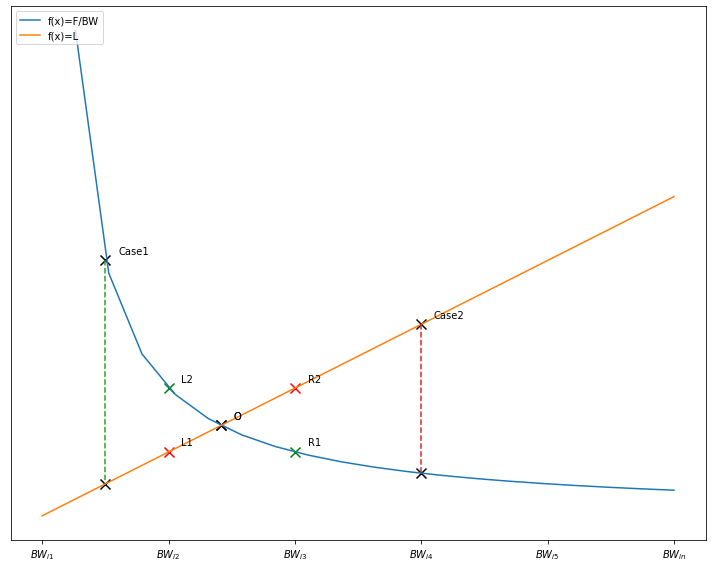

In [121]:
x = np.linspace(0, 5, 20)

plt.figure(figsize=(10,8))
plt.plot(x, 2/x, label='f(x)=F/BW')
plt.plot(x, x, label='f(x)=L')

plt.scatter(0.5, 4, marker='x', s=100, c='k')
plt.scatter(0.5, 0.5, marker='x', s=100, c='k')
plt.text(0.5+0.1, 4+0.1, "Case1")
plt.plot([0.5, 0.5], [4, 0.5], linestyle='--')

plt.scatter(3, 2/3, marker='x', s=100, c='k')
plt.scatter(3, 3, marker='x', s=100, c='k')
plt.text(3+0.1, 3+0.1, "Case2")
plt.plot([3, 3], [3,2/3], linestyle='--')

plt.scatter(np.sqrt(2), np.sqrt(2), marker='x', s=100, c='k')
plt.text(np.sqrt(2)+0.1, np.sqrt(2)+0.1, "O")

plt.scatter(np.sqrt(2), np.sqrt(2), marker='x', s=100, c='k')
plt.text(np.sqrt(2)+0.1, np.sqrt(2)+0.1, "O")
plt.scatter(1, 1, marker='x', s=100, c='r')
plt.text(1+0.1, 1+0.1, "L1")
plt.scatter(1, 2, marker='x', s=100, c='g')
plt.text(1+0.1, 2+0.1, "L2")
plt.scatter(2, 2, marker='x', s=100, c='r')
plt.text(2+0.1, 2+0.1, "R2")
plt.scatter(2, 1, marker='x', s=100, c='g')
plt.text(2+0.1, 1+0.1, "R1")
plt.legend(loc='upper left')
xlabels = ["$BW_{i1}$","$BW_{i2}$","$BW_{i3}$","$BW_{i4}$","$BW_{i5}$","$BW_{in}$"]
plt.xticks(np.arange(min(x), max(x)+1, 1.0), xlabels)
plt.yticks([], [])
plt.tight_layout()
plt.savefig("HW3_ans5_correctness.png")
plt.show()
    

In [86]:
x

array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
       1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
       2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
       3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [19]:
from HeuristicWordlePlayer import HeuristicWordlePlayer
from MaxInformationGainWordlePlayer import MaxInformationGainWordlePlayer

# 4. Example: The Heuristic Solver

### 4.1. Initiate a solver object

In [20]:
heuristic_player = HeuristicWordlePlayer(wordle, guess_list=words)

### 4.2. Play interactively with an unknown target

In [ ]:
from main import interactive_play

interactive_play(wordle, heuristic_player, with_target=False)

### use it to solve the daily Wordle

![alt text](img/solve_wordle_heuristic_alert_20220122.png "Solving Wordle on 2022/01/22")

### 4.3. Simulate the guessing process with a specific target word

In [ ]:
interactive_play(wordle, heuristic_player, with_target=True)

### 4.4. Specify a different "first-guess" other than the default 

In [11]:
interactive_play(wordle, heuristic_player, with_target=True, first_guess="raise")

##################################################
### Welcome to the Interactive Mode! ###
# Wordle Response Format-  A 5-character response with the format:
- "0": wrong letter
- "1": correct letter but wrong position
- "2": correct letter and correct position
##################################################
## Input Your Own Target? (<5-letter word>/empty):
laugh

TARGET:  laugh
# Guesses: 1, Picked Guess: raise (Score: 4067.00), # Available Candidates: 2315
# Responses: 02000
(... click Enter to proceed ...)

# Guesses: 2, Picked Guess: lynch (Score: 136.00), # Available Candidates: 91
# Responses: 20002
(... click Enter to proceed ...)

# Guesses: 3, Picked Guess: laugh (Score: 0.00), # Available Candidates: 1
# Responses: 22222
Congrats! Total Guesses: 3


### 4.5. Examinate the overall performance (number of guesses) of a "first-guess" among all possible targets

In [10]:
from main import get_first_guess_performance

get_first_guess_performance(wordle, heuristic_player, first_guess="raise")

100%|██████████| 2315/2315 [00:44<00:00, 51.82it/s]


'Mean: 3.824, Min: 1, Max: 6, Count of Guesses: [1] 1 [2] 28 [3] 687 [4] 1281 [5] 298 [6] 20'

### 4.6. Check the top-K "first-guess" (with the highest internal solver score) performances

In [9]:
from main import check_topK_guesses_performance

check_topK_guesses_performance(wordle, heuristic_player, topK=3)

  0%|          | 5/2315 [00:00<00:55, 41.59it/s]

##################################################
### Getting scores of all words at first guess ... ###
output/top_scores_HeuristicWordlePlayer.txt saved.
##################################################
### Checking performance of the topK words as a first guess for all possible targets...
##################################################


  0%|          | 5/2315 [00:00<00:54, 42.65it/s]

(0) Guess: alert (Score: 4117.00), Mean: 3.860, Min: 1, Max: 7, Count of Guesses: [1] 1 [2] 25 [3] 662 [4] 1269 [5] 329 [6] 26 [7] 3


  0%|          | 5/2315 [00:00<00:49, 46.90it/s]

(1) Guess: alter (Score: 4117.00), Mean: 3.855, Min: 1, Max: 6, Count of Guesses: [1] 1 [2] 25 [3] 649 [4] 1296 [5] 322 [6] 22


100%|██████████| 2315/2315 [00:45<00:00, 50.40it/s]

(2) Guess: later (Score: 4117.00), Mean: 3.859, Min: 1, Max: 6, Count of Guesses: [1] 1 [2] 34 [3] 643 [4] 1277 [5] 333 [6] 27


# 5. Max Information Gain Solver
- the usage is similar to the heuristic solver
- precomputation occurs at the first instantiate of the solver object
- use a larger word list for guessing improves the average number of guesses but also runs drastically slower

### 5.1. Initiate a solver object with a small-size word list and specifies the cache name for precomputation

In [12]:
mig_player = MaxInformationGainWordlePlayer(
    wordle, guess_list=small_words, precompute="small")

### 5.2. Play interactively with an unknown target

In [14]:
interactive_play(wordle, mig_player, with_target=False)

##################################################
### Welcome to the Interactive Mode! ###
# Wordle Response Format-  A 5-character response with the format:
- "0": wrong letter
- "1": correct letter but wrong position
- "2": correct letter and correct position
##################################################

TARGET:  UNKNOWN
# Guesses: 1, Picked Guess: raise (Score: 4.07), # Available Candidates: 2315
Type the response...
00102

# Guesses: 2, Picked Guess: lingo (Score: 2.59), # Available Candidates: 25
Type the response...
02200

# Guesses: 3, Picked Guess: rower (Score: 0.69), # Available Candidates: 2
Type the response...
00110

# Guesses: 4, Picked Guess: wince (Score: 0.00), # Available Candidates: 1
Type the response...
22222

Congrats! Total Guesses: 4


### use it to solve the daily Wordle

![alt text](img/solve_wordle_max_entropy_raise_20220122.png "Solving Wordle on 2022/01/22")

### 5.3. Examinate the overall performance (number of guesses) of a "first-guess" among all possible targets

In [16]:
get_first_guess_performance(wordle, mig_player, first_guess="react")

100%|██████████| 2315/2315 [13:52<00:00,  3.35it/s]


'Mean: 3.654, Min: 1, Max: 5, Count of Guesses: [1] 1 [2] 46 [3] 815 [4] 1344 [5] 109'

### 5.4. Initiate a solver object with a large-size word list

In [15]:
large_mig_player = MaxInformationGainWordlePlayer(
    wordle, guess_list=large_words, precompute="large")

### 5.4. Check the top-K "first-guess" (with the highest internal solver score) performances

In [ ]:
check_topK_guesses_performance(wordle, large_mig_player, topK=3)